# Part 1

## 1

In [1]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import re
import multiprocessing
from collections import Counter
import os
import tqdm
import re

In [2]:
st_words = set(stopwords.words('english'))
file_names = os.listdir(path="hpac_source")
tokenizer = RegexpTokenizer(r'\w+')

def cnt(name):
    with open(os.path.join('hpac_source', name)) as f:
        text = f.read()
    tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in tokens if not w in st_words and len(w) > 1]
    current_text_counter = Counter(filtered_words)
    with open(os.path.join('hpac_source_filtered', name), 'w+') as f:
        f.write(' '.join(filtered_words))
    return current_text_counter

pool = multiprocessing.Pool(processes=8)
results = pool.map(cnt, file_names)
pool.close()
pool.join()

In [3]:
common_counter = Counter()
for i in tqdm.tqdm_notebook(results):
    common_counter.update(dict(i.most_common(5000)))

/home/analekseev/PycharmProjects/NLP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [4]:
common_counter.most_common(1000)

[('harry', 4000480),
 ('said', 2262365),
 ('would', 1904645),
 ('hermione', 1831450),
 ('could', 1688265),
 ('back', 1400309),
 ('one', 1400091),
 ('draco', 1389930),
 ('like', 1275301),
 ('know', 1203946),
 ('eyes', 1033469),
 ('time', 1016961),
 ('ron', 906178),
 ('looked', 893445),
 ('get', 847653),
 ('asked', 826495),
 ('well', 802456),
 ('even', 770242),
 ('around', 767637),
 ('see', 744540),
 ('head', 737082),
 ('going', 718864),
 ('think', 716081),
 ('still', 694768),
 ('go', 667650),
 ('face', 657549),
 ('way', 656364),
 ('severus', 655536),
 ('room', 648484),
 ('hand', 639613),
 ('ginny', 639505),
 ('sirius', 630082),
 ('something', 623395),
 ('want', 613217),
 ('potter', 608390),
 ('thought', 608150),
 ('right', 603543),
 ('snape', 600428),
 ('away', 580725),
 ('much', 578715),
 ('two', 572219),
 ('look', 566544),
 ('never', 559461),
 ('really', 526366),
 ('knew', 524841),
 ('first', 523467),
 ('made', 513183),
 ('let', 513133),
 ('good', 510092),
 ('malfoy', 486325),
 ('wand

In [5]:
most_popular_words = []
for i in common_counter.most_common(1000):
    most_popular_words.append(i[0])

In [6]:
with open('most_common_1000.txt', 'w+') as f:
    for w in most_popular_words:
        f.write(w)
        f.write('\n')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

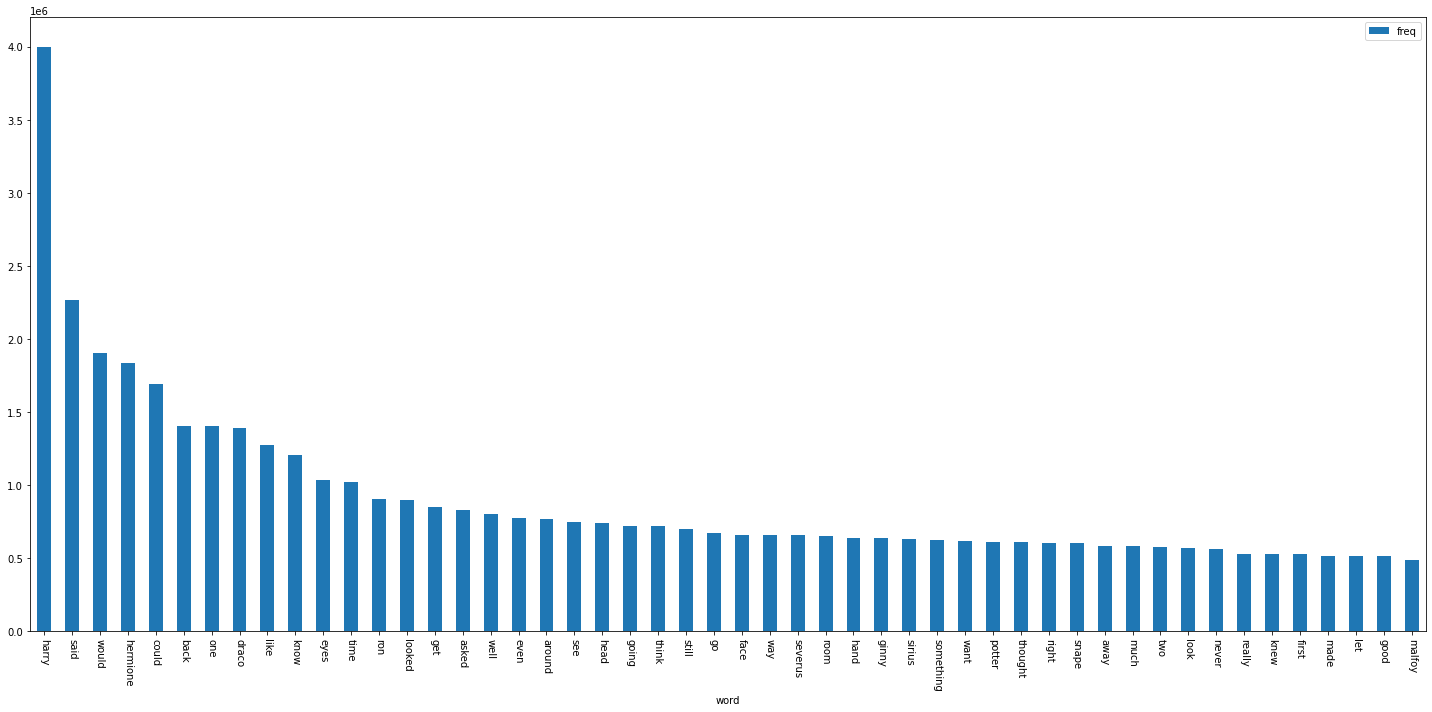

In [46]:
df = pd.DataFrame(common_counter.most_common(1000), columns = ['word', 'freq'])

ax = df.iloc[:50].plot.bar(x='word', y='freq', rot=-90, figsize=(20,10))
plt.tight_layout()
plt.savefig('most_common_50.png')

## 2 

## Load most common english first names and last names

In [22]:
with open('first_names.all.txt') as f:
    names = f.read()
first_names = set(names.split())

In [23]:
with open('last_names.all.txt') as f:
    names = f.read()
last_names = set(names.split())

## Get HP names. And select first names and last names 

In [24]:
with open('harry-potter-names.json') as f:
    hp_names = f.read()
hp_names = hp_names.replace('"', '')
hp_names = hp_names.replace(',', '')
hp_names = hp_names.replace('[', '')
hp_names = hp_names.replace(']', '')
hp_names = hp_names.replace('(', '')
hp_names = hp_names.replace(')', '')
hp_names = hp_names.split('\n')
hp_first_names = []
hp_last_names = []
for character in hp_names:
    name = character.split()
    if len(name) != 2:
        continue
    hp_first_names.append(name[0].lower())
    hp_last_names.append(name[1].lower())
    
    
hp_first_names = set(hp_first_names)
hp_last_names = set(hp_last_names)

In [25]:
all_last_names = last_names.union(hp_last_names)

In [26]:
all_first_names = first_names.union(hp_first_names)

## Find all first names in texts

In [27]:
def select_first_names(filename):
    with open(os.path.join('fanfiction_texts', filename)) as f:
        text = f.read()
    found_names = []
    name_candidates = re.findall('[A-Z]\w+', text)
    for word in name_candidates:
        if word.lower() in all_first_names:
            found_names.append(word.lower())
    return Counter(found_names)

In [28]:
file_names = os.listdir(path="hpac_filtered")
pool = multiprocessing.Pool(processes=7)
results = pool.map(select_first_names, file_names)
pool.close()
pool.join()

In [29]:
first_name_counter = Counter()
for i in tqdm.tqdm_notebook(results):
    first_name_counter.update(i)

/home/analekseev/PycharmProjects/NLP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [30]:
first_name_counter.most_common(10)

[('harry', 3994654),
 ('hermione', 1830884),
 ('draco', 1389286),
 ('ron', 905808),
 ('severus', 655471),
 ('ginny', 639193),
 ('sirius', 630024),
 ('james', 468712),
 ('remus', 433642),
 ('lily', 421981)]

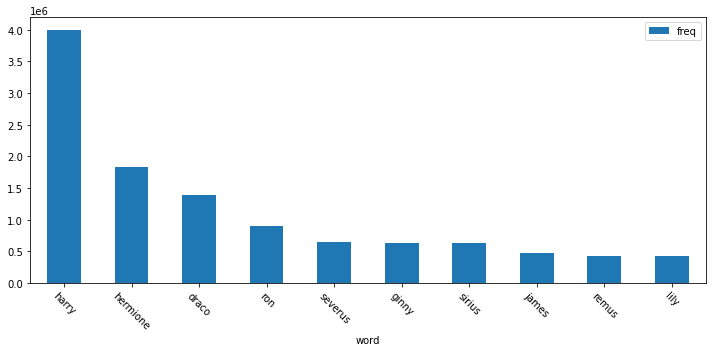

In [45]:
df = pd.DataFrame(first_name_counter.most_common(10), columns = ['word', 'freq'])

ax = df.plot.bar(x='word', y='freq', rot=-45, figsize=(10,5))
plt.tight_layout()
plt.savefig('most_common_names_10.png')

## Find all first + last names in texts

In [32]:
def select_first_last_names(filename):
    with open(os.path.join('fanfiction_texts', filename)) as f:
        text = f.read()
    found_names = []
    name_candidates = re.findall('[A-Z]\w+\s[A-Z]\w+', text)
    for pair in name_candidates:
        f_name, l_name = pair.split()
        if f_name.lower() in all_first_names and l_name.lower() in all_last_names:
            found_names.append(pair.lower())
    return Counter(found_names)

In [33]:
file_names = os.listdir(path="hpac_filtered")
pool = multiprocessing.Pool(processes=7)
results = pool.map(select_first_last_names, file_names)
pool.close()
pool.join()

In [34]:
first_last_name_counter = Counter()
for i in tqdm.tqdm_notebook(results):
    first_last_name_counter.update(i)

/home/analekseev/PycharmProjects/NLP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [35]:
first_last_name_counter.most_common(10)

[('harry potter', 122338),
 ('draco malfoy', 46330),
 ('hermione granger', 29214),
 ('severus snape', 28968),
 ('sirius black', 25979),
 ('lucius malfoy', 22740),
 ('james potter', 21010),
 ('albus dumbledore', 20183),
 ('tom riddle', 17868),
 ('remus lupin', 12716)]

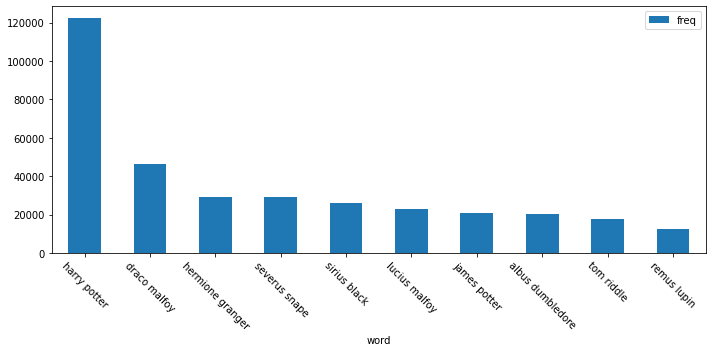

In [44]:
df = pd.DataFrame(first_last_name_counter.most_common(10), columns = ['word', 'freq'])

ax = df.plot.bar(x='word', y='freq', rot=-45, figsize=(10,5))
plt.tight_layout()
plt.savefig('most_common_f_l_names_10.png')

## Find all first professor + first/last name in texts

In [37]:
def select_prof_names(filename):
    with open(os.path.join('fanfiction_texts', filename)) as f:
        text = f.read()
    found_names = []
    name_candidates = re.findall('(Professor|professor)\s([A-Z]\w+)', text)
    for pair in name_candidates:
        prof, name = pair
        if name.lower() in all_first_names or name.lower() in all_last_names:
            found_names.append(' '.join([prof.lower(), name.lower()]))
    return Counter(found_names)

In [38]:
file_names = os.listdir(path="hpac_filtered")
pool = multiprocessing.Pool(processes=7)
results = pool.map(select_prof_names, file_names)
pool.close()
pool.join()

In [39]:
prof_counter = Counter()
for i in tqdm.tqdm_notebook(results):
    prof_counter.update(i)

/home/analekseev/PycharmProjects/NLP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [40]:
prof_counter.most_common(10)

[('professor snape', 44839),
 ('professor mcgonagall', 42772),
 ('professor dumbledore', 23956),
 ('professor lupin', 10017),
 ('professor flitwick', 9491),
 ('professor slughorn', 5832),
 ('professor sprout', 5760),
 ('professor trelawney', 3165),
 ('professor longbottom', 2371),
 ('professor binns', 2127)]

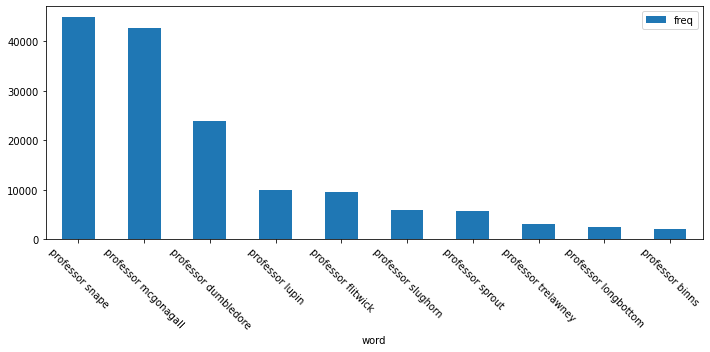

In [43]:
df = pd.DataFrame(prof_counter.most_common(10), columns = ['word', 'freq'])

ax = df.plot.bar(x='word', y='freq', rot=-45, figsize=(10,5))
plt.tight_layout()
plt.savefig('most_common_prof_names_10.png')